In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x = np.random.uniform(-3,3,100)
X = x.reshape(-1,1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

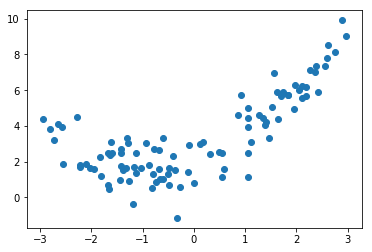

In [4]:
plt.scatter(x,y)
plt.show()

In [5]:
def polynomialRegression(degree):
    return Pipeline([
        ("poly_feat",PolynomialFeatures(degree=degree)),
        ("standard_scaler",StandardScaler()),
        ("lin_reg",LinearRegression())
    ])

In [6]:
pr = polynomialRegression(2)

pr.fit(X,y)

y_predict = pr.predict(X)

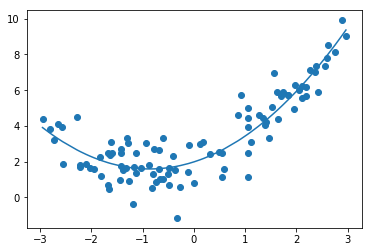

In [7]:
plt.scatter(X,y)
plt.plot(np.sort(x),y_predict[np.argsort(x)])
plt.show()

In [8]:
mean_squared_error(y,y_predict)

0.90859643658272926

### 使用最高相次为10次的多项式特征

In [9]:
pr = polynomialRegression(10)

pr.fit(X,y)

y_predict = pr.predict(X)

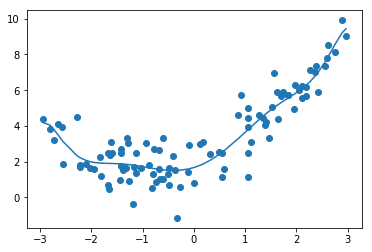

In [10]:
plt.scatter(X,y)
plt.plot(np.sort(x),y_predict[np.argsort(x)])
plt.show()

In [11]:
mean_squared_error(y,y_predict)

0.86298783009059277

### 使用最高相次为100的多项式特征

In [12]:
pr = polynomialRegression(100)

pr.fit(X,y)

y_predict = pr.predict(X)

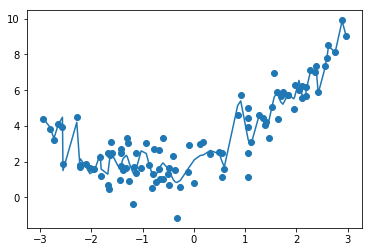

In [13]:
plt.scatter(X,y)
plt.plot(np.sort(x),y_predict[np.argsort(x)])
plt.show()

In [14]:
mean_squared_error(y,y_predict)

0.52420965566039379

#### 可视化效果并不是很好 因为数据不连续 因此我们使用一组连续的数据来预测

In [15]:
new_x = np.linspace(-3,3,100)

In [16]:
new_x.shape

(100,)

In [17]:
new_X = new_x.reshape(-1,1)

In [18]:
new_X.shape

(100, 1)

In [19]:
new_y = pr.predict(new_X)

In [20]:
new_y.shape

(100,)

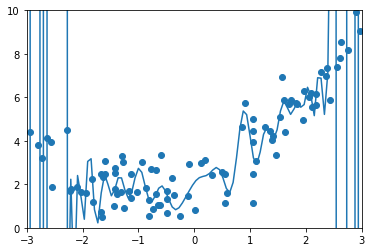

In [21]:
plt.scatter(X,y)
plt.plot(new_X[:,0],new_y)
plt.axis([-3,3,0,10])
plt.show()

## 以上图像说明了过拟合 使得曲线尽可能的接近每个训练数据点 以保证MSE最小

In [22]:
lr = LinearRegression()

In [23]:
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
y_predict = lr.predict(X)

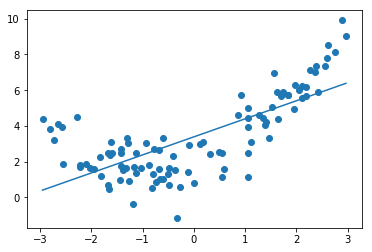

In [25]:
plt.scatter(X,y)
plt.plot(np.sort(x),y_predict[np.argsort(x)])
plt.show()